In [33]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.dpi"] = 100
plt.rcParams["savefig.bbox"] = "tight"

np.set_printoptions(precision=3)
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import scale, StandardScaler

### Step 1: Load the Cancer dataset
- Use `from sklearn.datasets import load_breast_cancer`
- Split data into train and test sets, utilize `data` and `target` from the downloaded cancer dataset

In [ ]:
from sklearn.datasets import load_breast_cancer

### Step 2: Fitting the Tree Model
- Create a tree model with `max_depth=2`. Use `from sklearn.tree import DecisionTreeClassifier`
- Plot the tree with feature names. Use `from sklearn.tree import plot_tree`

### Step 3: Parameter Tuning
- Create a grtid search for `max_depth`. Use integer values from 1 to 6.
- Plot the mean train and test scores versus the maximum depth


### Step 4: Parameter Tuning
- Create a grtid search for `max_leaf_nodes`. Use integer values from 2 to 19.
- Plot the mean train and test scores versus the maximum depth


### Step 5: Extrapolation
- Read the dataset `ram_prices.csv`
- Plot the price versus year. Use logarithmic scale for the price.
- Create train and test datasets by splitting the data as train data being data before year 2000 and test data being data after year 2000
- Use price as the target variable. Take logarithm of the price.
- Train a tree and linear regression model
- Plot the train and test datasets as well as the predictions for the train dataset
- Plot the train and test datasets as well as the predictions for the the entire dataset


In [34]:
import pandas as pd

In [42]:
ramdata = pd.read_csv('ram_price.csv', index_col=0)

In [43]:
ramdata.head()

,date,price
0,1957.0,411041792.0
1,1959.0,67947725.0
2,1960.0,5242880.0
3,1965.0,2642412.0
4,1970.0,734003.0


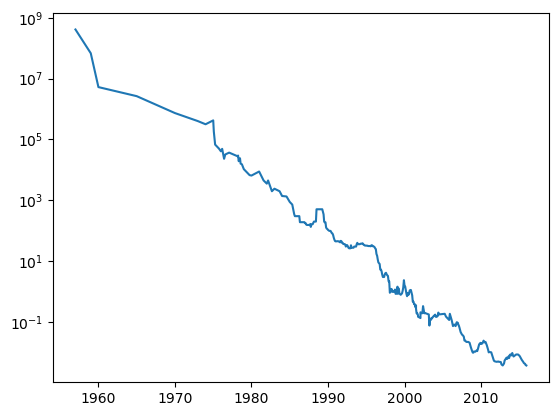

In [46]:
import numpy as np
plt.semilogy(ramdata.date, ramdata.price)

In [48]:
ramdata.info()

<class 'pandas.core.frame.DataFrame'>
Index: 333 entries, 0 to 332
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    333 non-null    float64
 1   price   333 non-null    float64
dtypes: float64(2)
memory usage: 7.8 KB


In [47]:
ramdata.date<2000

0       True
1       True
2       True
3       True
4       True
       ...  
328    False
329    False
330    False
331    False
332    False
Name: date, Length: 333, dtype: bool

In [61]:
data_train = ramdata[ramdata.date<=2000]
data_test = ramdata[ramdata.date>2000]

In [62]:
data_train.head()

,date,price
0,1957.0,411041792.0
1,1959.0,67947725.0
2,1960.0,5242880.0
3,1965.0,2642412.0
4,1970.0,734003.0


In [82]:
X_train = data_train['date']
y_train = np.log(data_train['price'])

In [68]:
X_test = data_test['date']
y_test = np.log(data_test['price'])

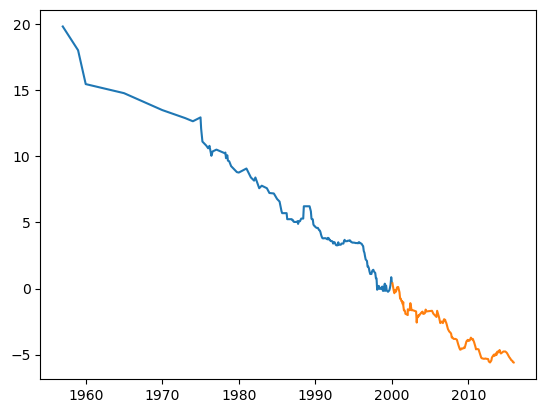

In [69]:
plt.plot(X_train, y_train)
plt.plot(X_test, y_test);

In [83]:
X_train.shape

(203,)

In [86]:
X_train = np.array(X_train)[:,np.newaxis]

In [88]:
X_test = np.array(X_test)[:,np.newaxis]

In [89]:
#X_train = np.array(X_train).reshape(-1,1)

In [87]:
X_train.shape

(203, 1)

In [103]:
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.linear_model import LinearRegression

In [105]:
dt = DecisionTreeRegressor(random_state=0, max_depth=4)

In [74]:
lr = LinearRegression()

In [106]:
dt.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=4, random_state=0)

In [91]:
lr.fit(X_train, y_train)

LinearRegression()

[Text(0.5, 0.8333333333333334, 'x[0] <= 1984.79\nsquared_error = 11.449\nsamples = 203\nvalue = 4.736'),
 Text(0.25, 0.5, 'x[0] <= 1975.165\nsquared_error = 8.406\nsamples = 34\nvalue = 10.724'),
 Text(0.125, 0.16666666666666666, 'squared_error = 6.303\nsamples = 9\nvalue = 14.694'),
 Text(0.375, 0.16666666666666666, 'squared_error = 1.446\nsamples = 25\nvalue = 9.295'),
 Text(0.75, 0.5, 'x[0] <= 1996.46\nsquared_error = 3.397\nsamples = 169\nvalue = 3.531'),
 Text(0.625, 0.16666666666666666, 'squared_error = 1.085\nsamples = 129\nvalue = 4.399'),
 Text(0.875, 0.16666666666666666, 'squared_error = 0.603\nsamples = 40\nvalue = 0.734')]

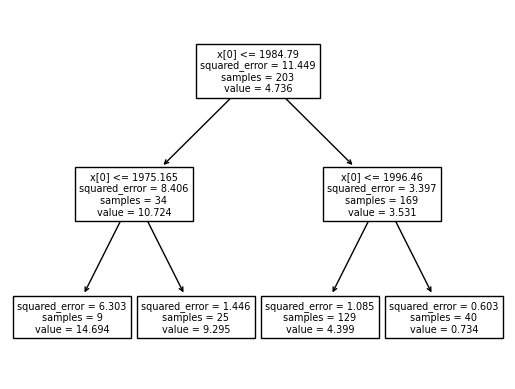

In [104]:
plot_tree(dt)

In [107]:
y_train_dt = dt.predict(X_train)
y_train_lr = lr.predict(X_train)

In [108]:
y_test_dt = dt.predict(X_test)
y_test_lr = lr.predict(X_test)

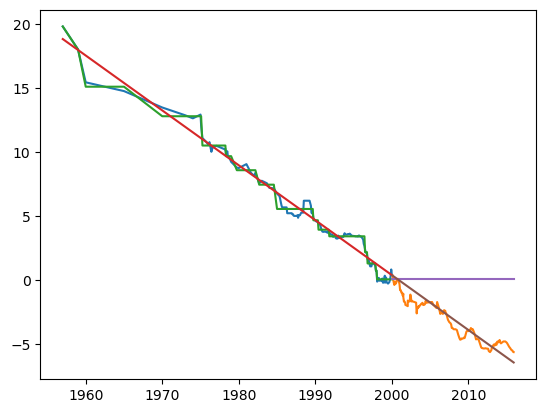

In [111]:
plt.plot(X_train, y_train)
plt.plot(X_test, y_test)
plt.plot(X_train, y_train_dt)
plt.plot(X_train, y_train_lr)
plt.plot(X_test, y_test_dt)
plt.plot(X_test, y_test_lr);

### Step 6: Feature Importance
- Load Iris dataset using `from sklearn.datasets import load_iris`
- Train a DT with `max_leaf_nodes=6`
- Plot the decision tree 
- Print the feature importance using `tree.feature_importances_`
- Create a bar graph for feature importance

In [ ]:
do you think, the magnitude of a coefficinet in a linear model reflects the
importance of the correspoding feature?
house price:  a1--squarefootage, a2--roomnumber,bathroomnumber, ..
a2>>a1 if you dont scale your dataset, 
if a1~a2

for each 1 unit increase of sqftdg, house price increases by 10 dollars
for each 1 unit increase of roomnumber, house price increases by 10 dollars

In [ ]:
X_all

x1, x2, x3, ..., xp

the feature which gives you the purest splits and/or the feature that is used more frequently
that feature would have a higher feature importance than the others

In [112]:
from sklearn.datasets import load_iris

In [113]:
iris = load_iris()

In [118]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [119]:
X = iris.data
y=iris.target
cols= iris.feature_names

In [120]:
from sklearn.tree import DecisionTreeClassifier

In [122]:
dtc = DecisionTreeClassifier(max_leaf_nodes=6, random_state=0)

In [123]:
dtc.fit(X,y)

DecisionTreeClassifier(max_leaf_nodes=6, random_state=0)

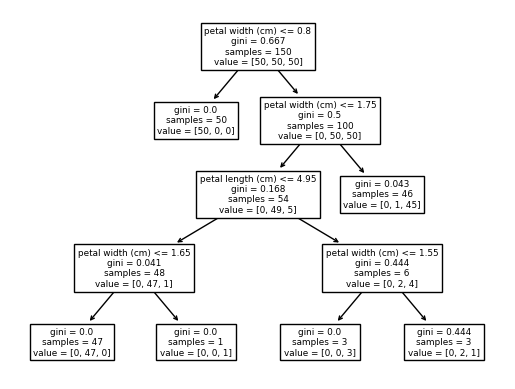

In [125]:
plot_tree(dtc, feature_names = cols);

In [127]:
dtc.feature_importances_

array([0.   , 0.   , 0.046, 0.954])

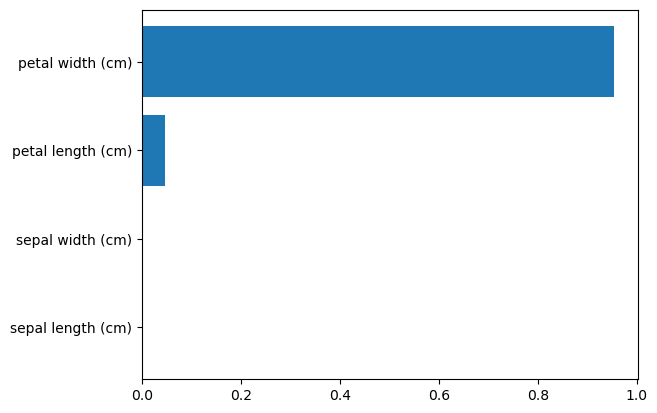

In [130]:
plt.barh(range(4), dtc.feature_importances_)
plt.yticks(range(4), cols);

In [133]:
pd.DataFrame(X, columns=cols).corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.117570,0.871754,0.817941
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126
petal length (cm),0.871754,-0.428440,1.000000,0.962865
petal width (cm),0.817941,-0.366126,0.962865,1.000000
